In [1]:
import math
from scipy import optimize

In [2]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 14,
          'figure.figsize': (14, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
plt.rcParams.update(params)

In [3]:
def minimize_dichotomy(f, a, b, epsilon):
    delta = epsilon / 2
    iterations = 0
    while b - a > epsilon:
        iterations += 1
        left = (a + b - delta) / 2
        right = (a + b + delta) / 2
        if f(left) <= f(right):
            b = right
        else:
            a = left
    return (a + b) / 2, iterations

def minimize_golden(f, a, b, epsilon):
    delta = (3 - math.sqrt(5.0)) / 2
    iterations = 0
    f_left = None
    f_right = None
    while b - a > epsilon:
        iterations += 1
        if f_left is None:
            left = a + delta * (b - a)
            f_left = f(left)
        if f_right is None:
            right = b - delta * (b - a)
            f_right = f(right)
            
        if f_left <= f_right:
            b = right
            right = left
            f_right = f_left
            f_left = None
        else:
            a = left
            left = right
            f_left = f_right
            f_right = None
    return (a + b) / 2, iterations

In [4]:
eps = 0.001

This wrapper counts the number of function invocations.

In [5]:
class InvocationsCounter:
    def __init__(self, f):
        self.f = f
        self.count = 0
    
    def __call__(self, x, *params):
        self.count += 1
        return self.f(x)

## a) $f(x) = x^3$, $x \in [0, 1]$

In [6]:
def f(x):
    if x < 0.0 or x > 1.0:
        return math.inf
    return x ** 3

counter = InvocationsCounter(f)
x = optimize.brute(counter, [slice(0.0, 1.0 + eps, eps)], finish=None)
print("Exhaustive search: the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x, f(x), counter.count, counter.count))

counter = InvocationsCounter(f)
x = minimize_dichotomy(counter, 0.0, 1.0, eps)
print("Dichotomy search : the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x[0], f(x[0]), counter.count, x[1]))

counter = InvocationsCounter(f)
x = minimize_golden(counter, 0.0, 1.0, eps)
print("Golden ratio     : the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x[0], f(x[0]), counter.count, x[1]))

Exhaustive search: the result is x=0.000000, f(x)=0.000000; f calculations 1001; iterations 1001
Dichotomy search : the result is x=0.000494, f(x)=0.000000; f calculations 22; iterations 11
Golden ratio     : the result is x=0.000367, f(x)=0.000000; f calculations 16; iterations 15


## b) $f(x) = |x - 0.2|$, $x \in [0, 1]$

In [7]:
def f(x):
    if x < 0.0 or x > 1.0:
        return math.inf
    return abs(x - 0.2)

counter = InvocationsCounter(f)
x = optimize.brute(counter, [slice(0.0, 1.0 + eps, eps)], finish=None)
print("Exhaustive search: the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x, f(x), counter.count, counter.count))

counter = InvocationsCounter(f)
x = minimize_dichotomy(counter, 0.0, 1.0, eps)
print("Dichotomy search : the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x[0], f(x[0]), counter.count, x[1]))

counter = InvocationsCounter(f)
x = minimize_golden(counter, 0.0, 1.0, eps)
print("Golden ratio     : the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x[0], f(x[0]), counter.count, x[1]))

Exhaustive search: the result is x=0.200000, f(x)=0.000000; f calculations 1001; iterations 1001
Dichotomy search : the result is x=0.200101, f(x)=0.000101; f calculations 22; iterations 11
Golden ratio     : the result is x=0.200073, f(x)=0.000073; f calculations 16; iterations 15


## c) $f(x) = x \sin \frac{1}{x}$ $x \in [0.01, 1]$

In [8]:
def f(x):
    if x <= 0.0 or x > 1.0:
        return math.inf
    return x * math.sin(1 / x)

counter = InvocationsCounter(f)
x = optimize.brute(counter, [slice(0.01, 1.0 + eps, eps)], finish=None)
print("Exhaustive search: the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x, f(x), counter.count, counter.count))

counter = InvocationsCounter(f)
x = minimize_dichotomy(counter, 0.01, 1.0, eps)
print("Dichotomy search : the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x[0], f(x[0]), counter.count, x[1]))

counter = InvocationsCounter(f)
x = minimize_golden(counter, 0.01, 1.0, eps)
print("Golden ratio     : the result is x=%f, f(x)=%f; f calculations %d; iterations %d" % (x[0], f(x[0]), counter.count, x[1]))

Exhaustive search: the result is x=0.223000, f(x)=-0.217225; f calculations 991; iterations 991
Dichotomy search : the result is x=0.222596, f(x)=-0.217234; f calculations 22; iterations 11
Golden ratio     : the result is x=0.222720, f(x)=-0.217232; f calculations 16; iterations 15


In [9]:
import random

In [10]:
A = random.random()
B = random.random()

A, B

(0.5413386381454871, 0.9381988917495738)

In [11]:
n = 100
xs = [k / n for k in range(n + 1)]
ys = [A * x + B + random.gauss(0, 1) for x in xs]

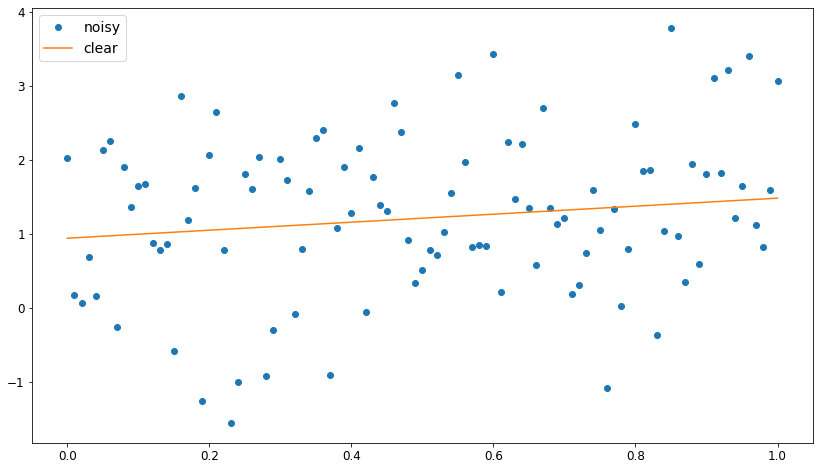

In [12]:
import matplotlib.pyplot as plt

plt.plot(xs, ys, 'o', label='noisy')
plt.plot(xs, [A * x + B for x in xs], label='clear')
plt.legend()
plt.show()

In [13]:
def D(f, a, b):
    return sum([(f(x, a, b) - y) ** 2 for x, y in zip(xs, ys)])

Exhaustive search: a=0.762000, b=0.871000 D(a, b)=114.587823; f calculations 1001000; iterations 1001000
Gauss            : a=0.761384, b=0.871521 D(a, b)=114.587815; f calculations 102; iterations 3
Nelder-Mead      : a=0.761105, b=0.871578 D(a, b)=114.587816; f calculations 65; iterations 33


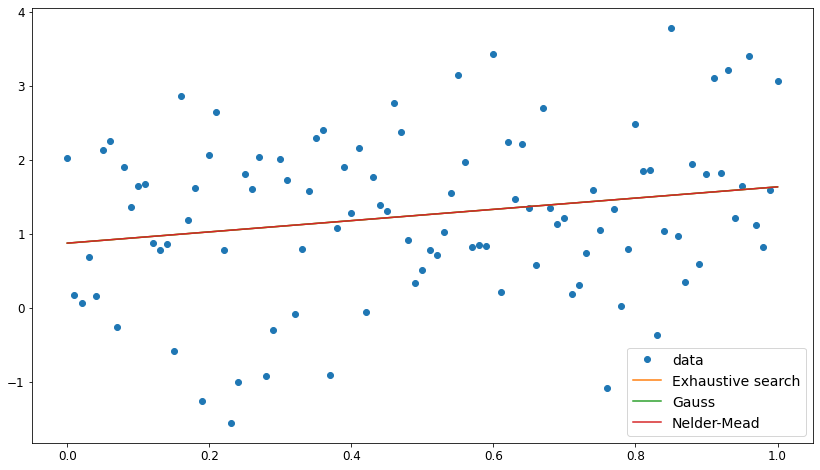

In [14]:
def f(x, a, b):
    return a * x + b

d = lambda z: D(f, z[0], z[1])

plt.plot(xs, ys, 'o', label='data')

counter = InvocationsCounter(d)
a, b = optimize.brute(counter, (slice(0.0, 1.0 + eps, eps), slice(0.0 + eps, 1.0 + eps, eps)), finish=None)
print("Exhaustive search: a=%f, b=%f D(a, b)=%f; f calculations %d; iterations %d" % (a, b, D(f, a, b), counter.count, counter.count))
plt.plot(xs, [f(x, a, b) for x in xs], label='Exhaustive search')

counter = InvocationsCounter(d)
sol = optimize.minimize(counter, (0.5, 0.5), method='Powell', tol=eps, options={'direc': [(0, 1), (1, 0)]})
print("Gauss            : a=%f, b=%f D(a, b)=%f; f calculations %d; iterations %d" % (sol.x[0], sol.x[1], D(f, sol.x[0], sol.x[1]), counter.count, sol.nit))
plt.plot(xs, [f(x, sol.x[0], sol.x[1]) for x in xs], label='Gauss')

counter = InvocationsCounter(d)
sol = optimize.minimize(counter, (0.5, 0.5), method='Nelder-Mead', tol=eps)
print("Nelder-Mead      : a=%f, b=%f D(a, b)=%f; f calculations %d; iterations %d" % (sol.x[0], sol.x[1], D(f, sol.x[0], sol.x[1]), counter.count, sol.nit))
plt.plot(xs, [f(x, sol.x[0], sol.x[1]) for x in xs], label='Nelder-Mead')

plt.legend()
plt.show()

Exhaustive search: a=0.909000, b=-0.490000 D(a, b)=114.004238; f calculations 4002000; iterations 4002000
Gauss            : a=0.908565, b=-0.490097 D(a, b)=114.004232; f calculations 98; iterations 4
Nelder-Mead      : a=0.908847, b=-0.489713 D(a, b)=114.004225; f calculations 109; iterations 56


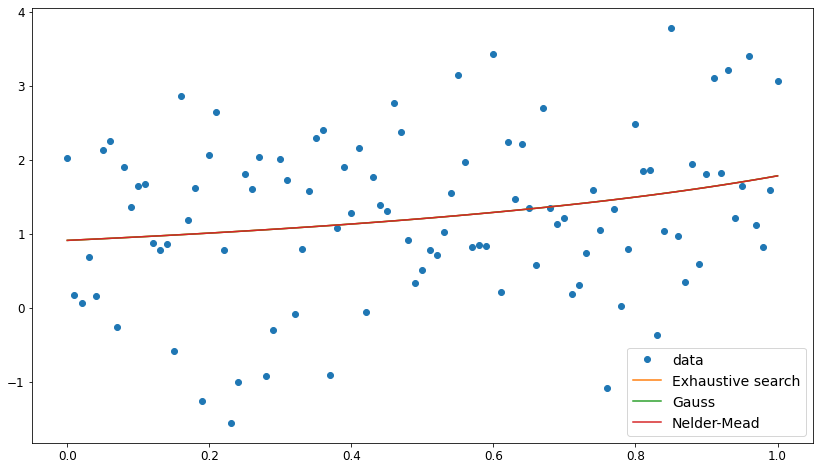

In [15]:
def f(x, a, b):
    return a / (1 + b * x)

d = lambda z: D(f, z[0], z[1])

plt.plot(xs, ys, 'o', label='data')

counter = InvocationsCounter(d)
a, b = optimize.brute(counter, (slice(-1.0, 1.0 + eps, eps), slice(-1.0 + eps, 1.0 + eps, eps)), finish=None)
print("Exhaustive search: a=%f, b=%f D(a, b)=%f; f calculations %d; iterations %d" % (a, b, D(f, a, b), counter.count, counter.count))
plt.plot(xs, [f(x, a, b) for x in xs], label='Exhaustive search')

counter = InvocationsCounter(d)
sol = optimize.minimize(counter, (0.0, 0.0), method='Powell', tol=eps, options={'direc': [(0, 1), (1, 0)]})
print("Gauss            : a=%f, b=%f D(a, b)=%f; f calculations %d; iterations %d" % (sol.x[0], sol.x[1], D(f, sol.x[0], sol.x[1]), counter.count, sol.nit))
plt.plot(xs, [f(x, sol.x[0], sol.x[1]) for x in xs], label='Gauss')

counter = InvocationsCounter(d)
sol = optimize.minimize(counter, (0.0, 0.0), method='Nelder-Mead', tol=eps)
print("Nelder-Mead      : a=%f, b=%f D(a, b)=%f; f calculations %d; iterations %d" % (sol.x[0], sol.x[1], D(f, sol.x[0], sol.x[1]), counter.count, sol.nit))
plt.plot(xs, [f(x, sol.x[0], sol.x[1]) for x in xs], label='Nelder-Mead')

plt.legend()
plt.show()